# Coffee Shop Sales - Python Data Analysis

_FICTIONAL SCENARIO_ <br>
Coffee Shop has shared this dataset with my team to develop an analysis and answer a few questions they had:
1. What was the total sales per month from January to June of 2023.
2. How the stores rank in sales compared to one another.
3. What time of the day would be better for marketing campaign.
4. Which of the product types are more interesting to buyers.


#### This dataset was retrieved from Maven Analystics on [this link](https://mavenanalytics.io/data-playground?page=5&pageSize=5)

## Importing the data

In [62]:
# Import all the relevant libraries to be used with Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Assing the the dataset to a variable called df. Stand for Date Frame
df = pd.read_excel('Coffee Shop Sales.xlsx')

In [64]:
# Print the first 5 rows
df.head(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


## Cleaning the data

In [65]:
# Checking the column types
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [66]:
#checking for  Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


Everything things to be in order so no more cleaning needed.

## Managing values

In [67]:
### Create a column base on the hour the transaction was made
df['day_period'] = df['transaction_time'].astype(str).str[0:2]
### Convert the new column from 'Object' data type to 'int64'
df['day_period'] = df['day_period'].astype('int64')

In [68]:
### Create a column called sales that will hold the total of transactions times price
df['sales'] = df['transaction_qty'] * df['unit_price']

In [149]:
### Create a column for month
df['month'] = df['transaction_date'].astype(str).str[5:7]
### Convert new column to int type
df['month'] = df['month'].astype('int64')
# import calendar library for better visual outcome
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

### Which month was more lucrative overall

In [147]:
# Create a copy of original data frame with only the information we need for this presentation
month_sale_df = df[['month','sales']].copy()
# Set the month column in order
month_sale_df['month'] = pd.Categorical(month_sale_df['month'], categories=['Jan', 'Feb', 'Mar','Apr','May','Jun'], ordered=True);
# Change the column sales by its sum grouped by their month
month_sale_df = month_sale_df.groupby('month',observed=True)['sales'].sum().reset_index()


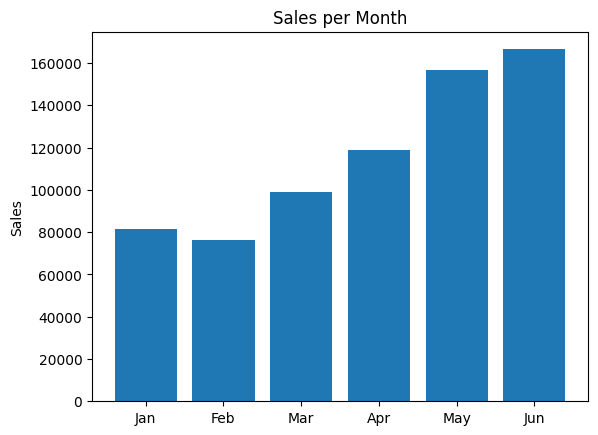

In [148]:
# create a visualization Sales per Months
plt.bar(month_sale_df['month'], month_sale_df['sales'])
plt.title('Sales per Month')
plt.ylabel('Sales')
plt.show()

#### From this we can expect a high period of sales from May of next year

### Which store had the more number of transactions

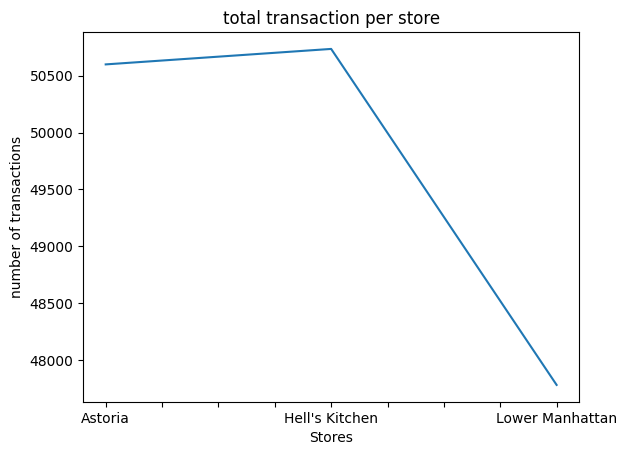

In [137]:
#create a data frame to calculate total number of sales per store location
transaction_store_df = df.groupby(['store_location'])['transaction_id'].count()
#plot the visualization in Line format
transaction_store_df.plot (
    kind= 'line',
    title= 'total transaction per store',
    xlabel='Stores',
    ylabel= 'number of transactions'
    #y= df['store_location']
)
plt.show()

#### We should see what tactics are missing from 'Lower Manhattan' for them to be nearly 3 thousand sales behind the other retailers

### When should we invest in advertisement 

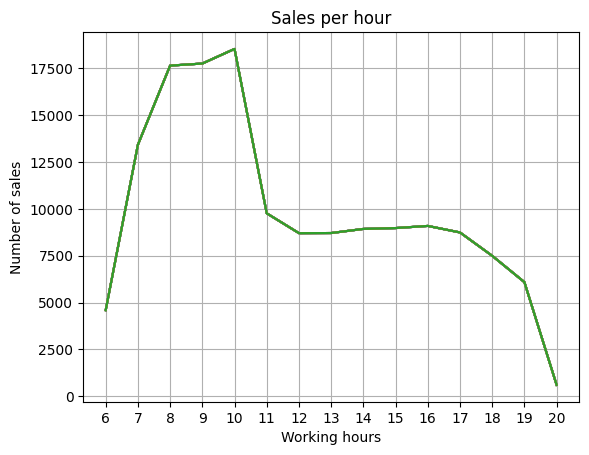

In [90]:
# create a variable to retain number in order representing hours of the day
hours = [hour for hour, df in df.groupby('day_period')]
#create a plot of line with grid for better visuazliation of the peak times
plt.plot(hours, df.groupby(df['day_period']).count());
plt.xticks(hours)
plt.ylabel('Number of sales')
plt.xlabel('Working hours')
plt.title('Sales per hour')
plt.grid()
plt.show()

#### We can tell from the above graph that the peak hours are between 9 to 11am, this would be relevant data to pass on to the marketing team 

### Which is the top seller

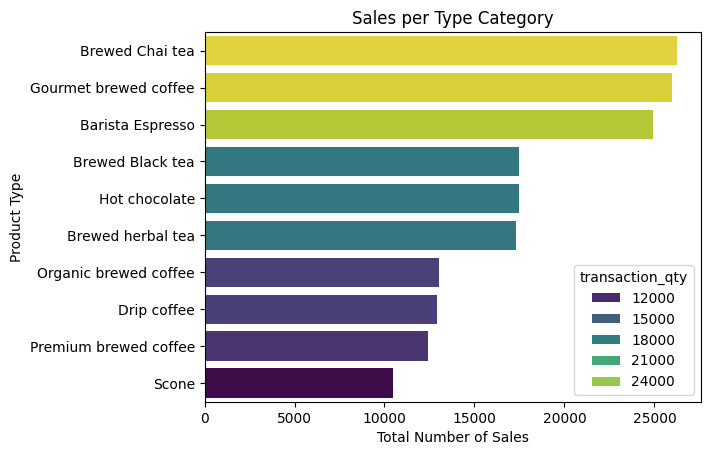

In [144]:


transaction_per_type = df.groupby('product_type')['transaction_qty'].sum().reset_index()
top_10_types = transaction_per_type.sort_values(by='transaction_qty', ascending=False).head(10)
sns.barplot(x='transaction_qty', y='product_type',hue='transaction_qty', data=top_10_types, palette='viridis');
plt.xlabel('Total Number of Sales')
plt.ylabel('Product Type')
plt.title('Sales per Type Category');
plt.show()

#### The Brewed Chai Tea is our leading product but not far from the second and third place. With this in mind we should be able to make a promotion including this products to incentivate buyers.

## Conclusion

#### With every question answered we can finilized this data analysis

##### Made by Nichollas Garcia